<div class="alert alert-danger alertdanger" style="margin-top: 20px; background-color: lightgreen; color: black;">
<h3>What You're Aiming For:</h3>

<b> In this checkpoint, we are going to work on the 'Climate change in Africa' dataset that was provided by the U.S global change research program.

Dataset description: This dataset contains historical data about the daily min, max and average temperature fluctuation in 5 African countries (Egypt, Tunisia, Cameroon, Senegal, Angola) between 1980 and 2023.

➡️ Dataset link

https://i.imgur.com/w2czdso.jpg </b>

<h3>Instructions:</h3>

<b> Load the dataset into a data frame using Python.
Clean the data as needed.
Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.
Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.
Select the best chart to show the Average temperature per country.
Make your own questions about the dataset and try to answer them using the appropriate visuals. <b>

</div>

#### Load the dataset into a data frame

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/HARDEY/Documents/GOMYCODE/Python/Africa_climate_change.csv")

# Display the first few rows of the dataframe
print(df.head())

              DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon


####  Clean the data as needed.

In [8]:
import numpy as np

# Convert DATE to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d %H%M%S', errors='coerce')

# Fill missing PRCP values with the median
df['PRCP'].fillna(df['PRCP'].median(), inplace=True)

# Interpolate TAVG values
df['TAVG'].interpolate(method='linear', inplace=True)

# Fill missing TMAX and TMIN values with mean
df['TMAX'].fillna(df['TMAX'].mean(), inplace=True)
df['TMIN'].fillna(df['TMIN'].mean(), inplace=True)

# Verify the data cleaning
print(df.isnull().sum())

DATE       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
COUNTRY    0
dtype: int64


#### Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.

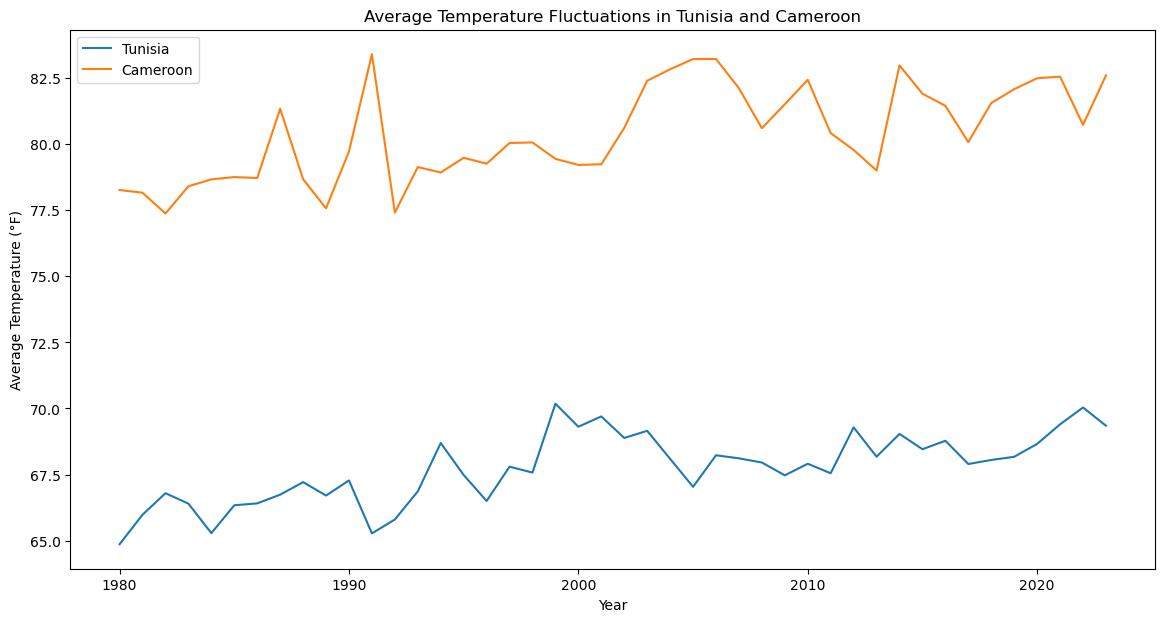

In [11]:
import matplotlib.pyplot as plt

# Filter data for Tunisia and Cameroon
tunisia = df[df['COUNTRY'] == 'Tunisia']
cameroon = df[df['COUNTRY'] == 'Cameroon']

# Group by year and calculate mean temperature
tunisia_avg = tunisia.groupby(tunisia['DATE'].dt.year)['TAVG'].mean()
cameroon_avg = cameroon.groupby(cameroon['DATE'].dt.year)['TAVG'].mean()

# Plot the line chart
plt.figure(figsize=(14, 7))
plt.plot(tunisia_avg.index, tunisia_avg, label='Tunisia')
plt.plot(cameroon_avg.index, cameroon_avg, label='Cameroon')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon')
plt.legend()
plt.show()

##### Interpretation
Tunisia (Blue Line):

The average temperatures in Tunisia start at around 64°F in 1980.
There is a noticeable fluctuation in the average temperatures over the years.
The overall trend shows a gradual increase in average temperatures, particularly noticeable from the 1990s onwards.
By 2020, the average temperature appears to be around 70°F, indicating an overall increase over the 40-year period.

Cameroon (Orange Line):

The average temperatures in Cameroon start at around 77°F in 1980.
The fluctuations in Cameroon's average temperatures are more pronounced compared to Tunisia.
There are peaks and troughs, indicating significant year-to-year variability.
Despite the fluctuations, the overall trend also shows an increase in average temperatures, with some years reaching up to 82.5°F.
By 2020, the average temperature is around 81°F, indicating an increase over the observed period.

#### Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

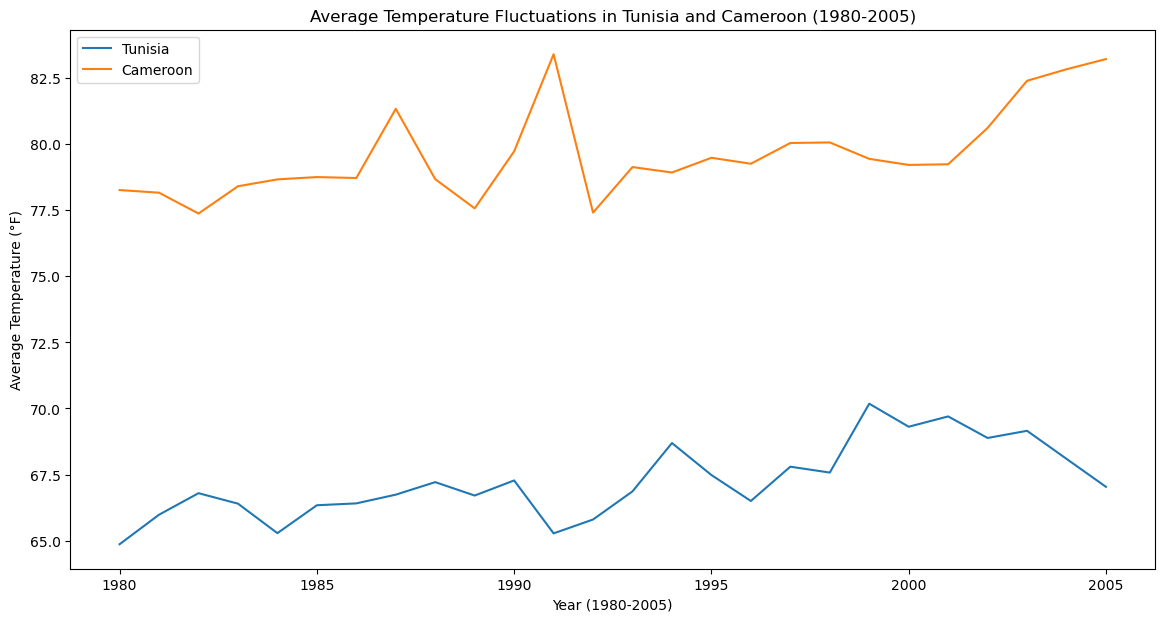

In [16]:
# Filter data between 1980 and 2005
tunisia_avg_zoomed = tunisia_avg.loc[1980:2005]
cameroon_avg_zoomed = cameroon_avg.loc[1980:2005]

# Plot the zoomed line chart
plt.figure(figsize=(14, 7))
plt.plot(tunisia_avg_zoomed.index, tunisia_avg_zoomed, label='Tunisia')
plt.plot(cameroon_avg_zoomed.index, cameroon_avg_zoomed, label='Cameroon')
plt.xlabel('Year (1980-2005)')
plt.ylabel('Average Temperature (°F)')
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon (1980-2005)')
plt.legend()
plt.show()

#### Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.

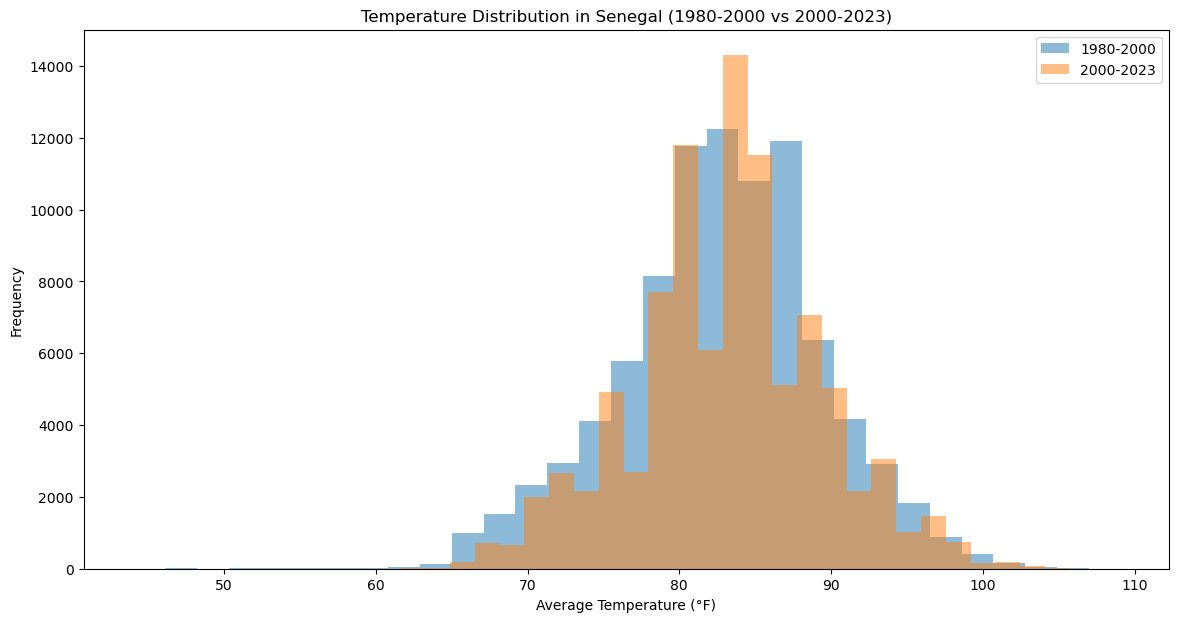

In [19]:
# Filter data for Senegal
senegal = df[df['COUNTRY'] == 'Senegal']

# Filter data for the two time periods
senegal_1980_2000 = senegal[(senegal['DATE'].dt.year >= 1980) & (senegal['DATE'].dt.year <= 2000)]
senegal_2000_2023 = senegal[(senegal['DATE'].dt.year > 2000) & (senegal['DATE'].dt.year <= 2023)]

# Plot histograms
plt.figure(figsize=(14, 7))
plt.hist(senegal_1980_2000['TAVG'], bins=30, alpha=0.5, label='1980-2000')
plt.hist(senegal_2000_2023['TAVG'], bins=30, alpha=0.5, label='2000-2023')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution in Senegal (1980-2000 vs 2000-2023)')
plt.legend()
plt.show()

This histogram compares the temperature distribution in Senegal between two periods: 1980-2000 and 2000-2023. The x-axis represents the average temperature in degrees Fahrenheit (°F), and the y-axis represents the frequency of occurrence of these temperatures.

##### Analysis of the Chart

Overall Shape and Distribution:

The chart displays two overlapping histograms: one for the period 1980-2000 (in blue) and the other for the period 2000-2023 (in orange).
Both histograms show a bell-shaped distribution, indicating that most of the temperature readings are clustered around the central values.
Temperature Ranges:

For the period 1980-2000, the temperatures mainly range between 65°F and 95°F, with a peak around 80°F.
For the period 2000-2023, the temperatures also mainly range between 70°F and 95°F, with a peak around 82°F.
Frequency Peaks:

The blue histogram (1980-2000) shows the highest frequency around 80°F, with a significant number of occurrences between 75°F and 85°F.
The orange histogram (2000-2023) shows the highest frequency around 82°F, with a significant number of occurrences between 80°F and 85°F.

#### Select the best chart to show the Average temperature per country.

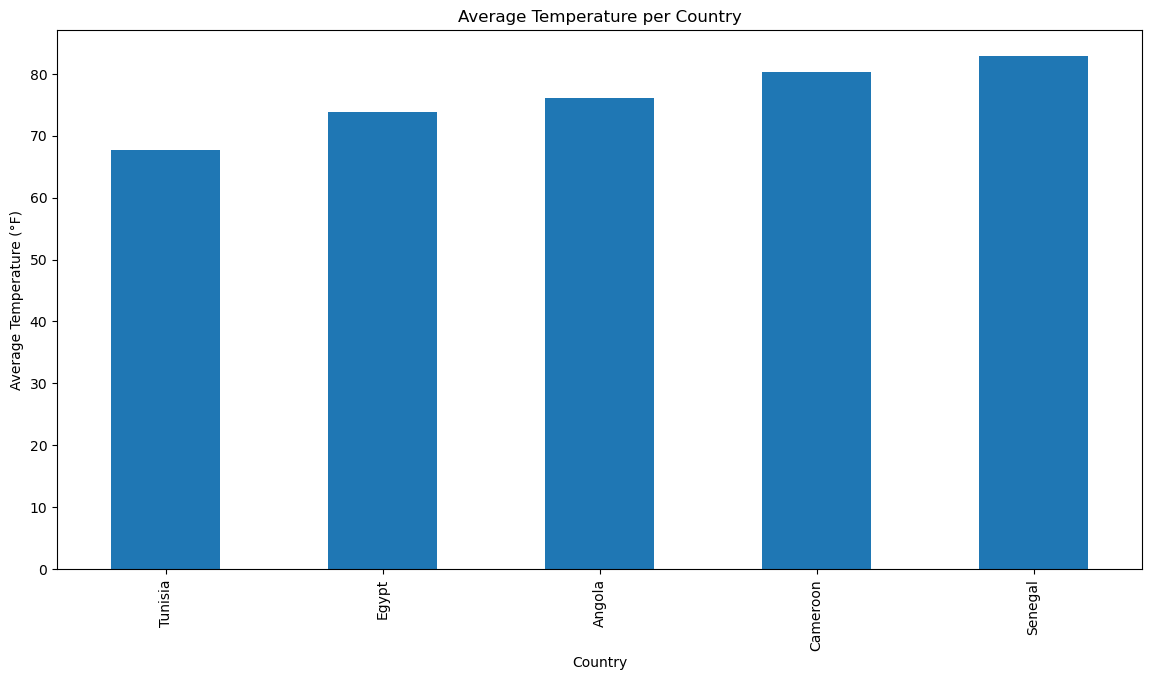

In [23]:
# Group by country and calculate mean temperature
avg_temp_per_country = df.groupby('COUNTRY')['TAVG'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(14, 7))
avg_temp_per_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°F)')
plt.title('Average Temperature per Country')
plt.show()

#### Make your own questions about the dataset and try to answer them using the appropriate visuals.

##### How does the minimum temperature (TMIN) distribution compare between different countries?

<Figure size 1200x600 with 0 Axes>

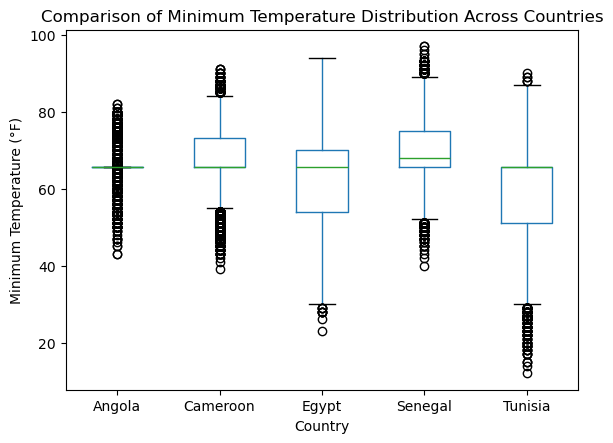

In [27]:
# Filter data for countries with sufficient data
countries = df['COUNTRY'].value_counts().index[:5]  # Select top 5 countries by data points
filtered_df = df[df['COUNTRY'].isin(countries)]

# Plot box plots for TMIN distribution
plt.figure(figsize=(12, 6))
filtered_df.boxplot(column='TMIN', by='COUNTRY', grid=False)
plt.xlabel('Country')
plt.ylabel('Minimum Temperature (°F)')
plt.title('Comparison of Minimum Temperature Distribution Across Countries')
plt.suptitle('')  # Suppress the default title
plt.show()

In [ ]:
#####